In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from ipywidgets import interact
import ipywidgets as widgets
sns.set(rc={'figure.figsize':(10,10)})

### Algorithm

In [102]:
def principal_components(X):
    # perform an eigendecomposition of the covariance matrix (assumes X has mean zero)
    w, v = np.linalg.eig(X.T @ X)
    # sort the eigenvectors by eigenvalue
    eigevector_idxs = [tup[0] for tup in sorted(enumerate(w), key=lambda tup: tup[1], reverse=True)]
    # return eigenvectors in descending eigenvalue order
    return v[:,eigevector_idxs]

**Example**: Simulated data in $R^2$

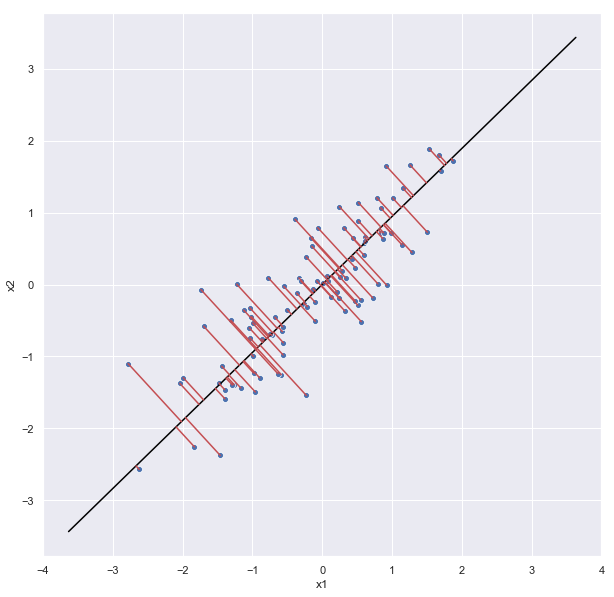

In [105]:
X = np.random.multivariate_normal([0,0], [[1, 0.8],[0.8,1]], 100)
scatter_df = pd.DataFrame(X, columns=['x1','x2'])
components = principal_components(X)

# draw the first principal component 
first_component = components[:,0] 
ax = sns.scatterplot(x='x1', y='x2', data=scatter_df)
x1, y1 = first_component
ax.plot([0,x1 * 5],[0,y1 * 5], c='black')
ax.plot([0,x1 * -5],[0,y1 * -5], c='black')

# draw the orthogonal projection of each data point onto the first principal component
projections = X @ first_component.reshape(-1,1)
for idx,p in enumerate(projections):
    x_x, x_y = X[idx]
    z_x, z_y = p * first_component
    ax.plot([x_x, z_x],[x_y,z_y], c='r') 

**Example**: Eigenfaces

In [107]:
def eigenface(comps, face):
    w = components[:,np.arange(0, comps)]
    z = faces @ w
    x_hat = z @ w.T
    plt.imshow(x_hat[face].reshape(64,64))
    
dataset = datasets.fetch_olivetti_faces()
faces = dataset.data
components = principal_components(faces)
interact(eigenface, comps=widgets.IntSlider(min=1, max=100, value=10), 
         face=widgets.IntSlider(min=0, max=faces.shape[0] -1, value=10))

interactive(children=(IntSlider(value=10, description='comps', min=1), IntSlider(value=10, description='face',…

<function __main__.eigenface(comps, face)>